# ASSIGNMENT 2 - AutoML
##  <span style="color:gray;font-family: Times New Roman"><u>Data Set - Airlines Customer Satisfaction</u></span> 

### Author : Shivani Shekhawat 
### NUID : 002656554

# Abstract

Given that the global airline industry is considered one of the most competitive markets, numerous attempts have been made to explore strategies for success in this industry. Among these, improving customers’ perceived satisfaction is an important topic for airline service providers. 

In this notebook, we have used H2O AutoML to create a predictive model and interpret them. We have created multivariate models.

**AutoML(Automated Machine Learning)** is the process of automating the time-consuming, iterative tasks of machine learning model development. It allows data scientists, analysts, and developers to build ML models with high scale, efficiency, and productivity all while sustaining model quality. 

**H2O** is a fully open source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms including gradient boosted machines, generalized linear models, deep learning and more. H2O also has an industry leading AutoML functionality that automatically runs through all the algorithms and their hyperparameters to produce a leaderboard of the best models.








# About the data:

The data is obtained from Kaggle. It consists of 1,29,880 rows and 23 columns. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.
It includes several categorical and numeric variables.

Features:

  1. satisfaction: **Categorical**, used for binary classification.
  2. Gender: **Categorical**
  3. Customer Type: **Categorical**
  4. Age: Numerical
  5. Type of Travel: **Categorical**
  6. Class: **Categorical**(Used for multiclass classification)
  7. Flight Distance: **Numerical**(Used for Regression)
  8. Seat comfort: **Categorical**
  9. Departure/Arrival time convenient: **Categorical**
  10. Food and drink: **Categorical**
  11. Gate location: **Numerical**
  12. Inflight wifi service: **Categorical**
  13. Inflight entertainment: **Categorical**
  14. Online support: **Categorical**
  15. Ease of Online booking: **Categorical**
  16. On-board service: **Categorical**
  17. Leg room service: **Categorical**
  18. Baggage handling: **Categorical**
  19. Checkin service: **Categorical**
  20. Cleanliness: **Categorical**
  21. Online boarding: **Categorical**
  22. Departure Delay in Minutes: **Numerical**
  23. Arrival Delay in Minutes: **Numerical**

In [1]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
#h2o.init()
h2o.init(ip="127.0.0.1", max_mem_size_GB = 200, nthreads = 10)

Checking whether there is an H2O instance running at http://127.0.0.1:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3y4kym2s
  JVM stdout: /tmp/tmp3y4kym2s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3y4kym2s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_b9g2g8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,200 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
airline_csv = "Invistico_Airline.csv"  # modify this for your machine
# Alternatively, you can import the data directly from a URL
#loan_csv = "https://raw.githubusercontent.com/h2oai/app-consumer-loan/master/data/loan.csv"
data = h2o.import_file(airline_csv) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data

satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0
satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0
satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15
satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0
satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0
satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26


In [6]:
data.shape

(129880, 23)

In [7]:
data.describe()

Rows:129880
Cols:23

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
type,enum,enum,enum,int,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,,,,7.0,,,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mean,,,,39.42795657530019,,,1981.4090545118563,2.8385971666153407,2.990645210963968,2.8519941484447218,2.990421927933473,3.249129966122576,3.383477055743759,3.5197028025870067,3.472105020018482,3.465075454265473,3.4859023714197677,3.6956729288574106,3.340806898675698,3.7057591623036648,3.3525870033877436,14.713712657838007,15.091128839188476
maxs,,,,85.0,,,6951.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0
sigma,,,,15.119359950371678,,,1027.1156056133966,1.3929832432699074,1.5272243703451132,1.4437293865730396,1.3059698939850524,1.3188175196680607,1.3460591444981036,1.3065106903517523,1.3055596480285911,1.2708355823355106,1.2922259830022513,1.1564833967397001,1.2605822849545907,1.1517739117986967,1.2987145021407451,38.07112621503652,38.46565024011919
zeros,,,,0,,,0,4797,6664,5945,2,132,2978,1,18,5,444,0,1,5,14,73356,72753
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,393
0,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0


In [8]:
data['satisfaction'] = data['satisfaction'].asfactor()  #encode the binary repsonse as a factor

In [9]:
data['satisfaction'].levels()  #optional: after encoding, this shows the two factor levels, '0' and '1'

[['dissatisfied', 'satisfied']]

In [4]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility

splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [11]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

90985
19388
19507


# BINARY CLASSIFICATION

In [12]:
y = 'satisfaction'
x = list(data.columns)

In [13]:
x

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [14]:
x.remove(y)  #remove the response

In [15]:
data_as_df = data.as_data_frame()

Getting distribution plots for checking normality

Plotting for column satisfaction


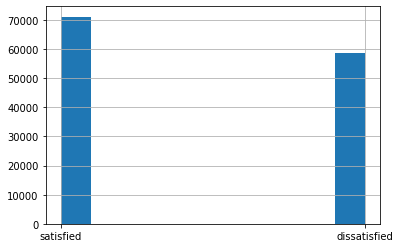

Plotting for column Gender


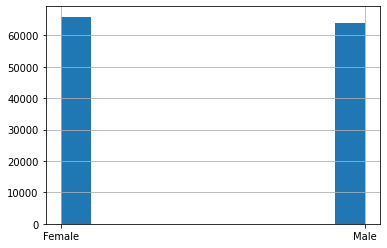

Plotting for column Customer Type


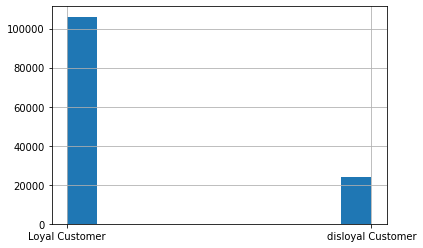

Plotting for column Age


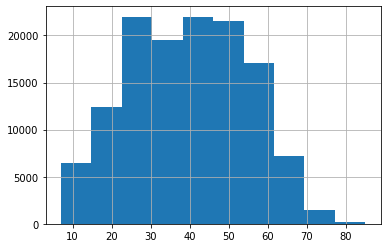

Plotting for column Type of Travel


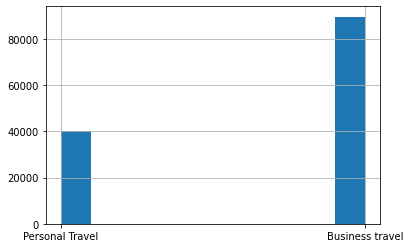

Plotting for column Class


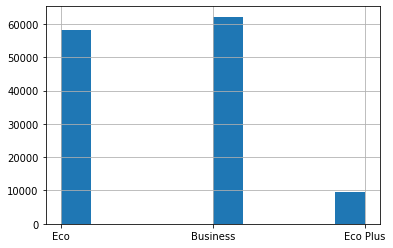

Plotting for column Flight Distance


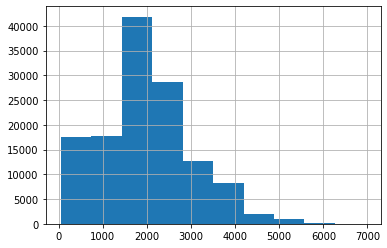

Plotting for column Seat comfort


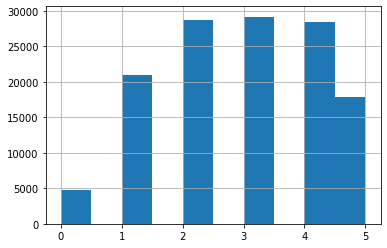

Plotting for column Departure/Arrival time convenient


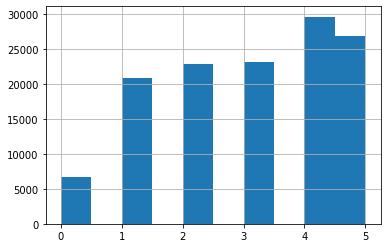

Plotting for column Food and drink


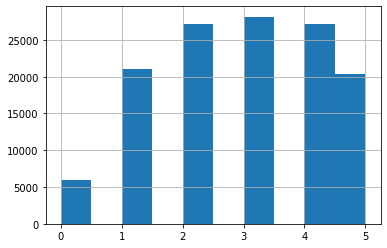

Plotting for column Gate location


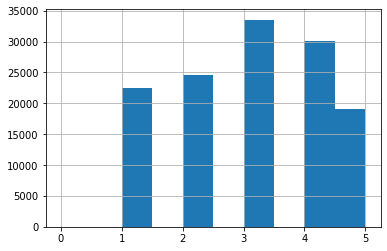

Plotting for column Inflight wifi service


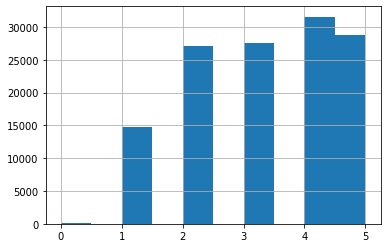

Plotting for column Inflight entertainment


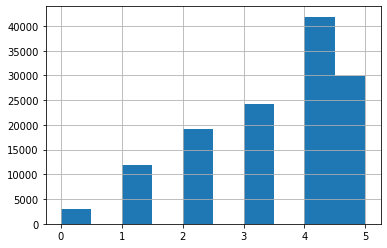

Plotting for column Online support


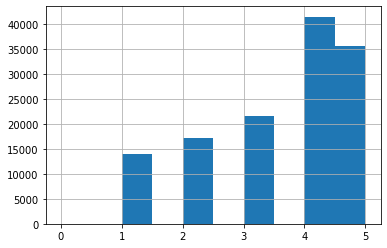

Plotting for column Ease of Online booking


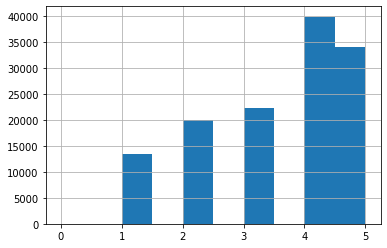

Plotting for column On-board service


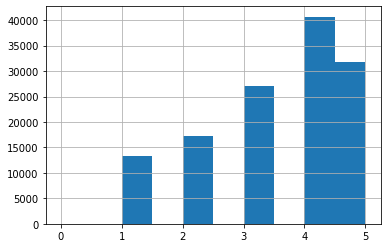

Plotting for column Leg room service


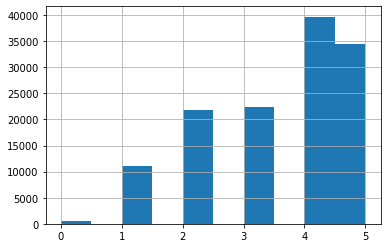

Plotting for column Baggage handling


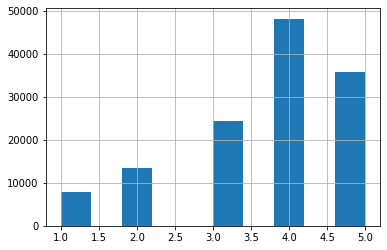

Plotting for column Checkin service


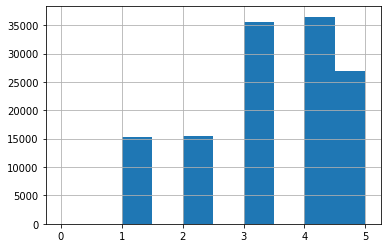

Plotting for column Cleanliness


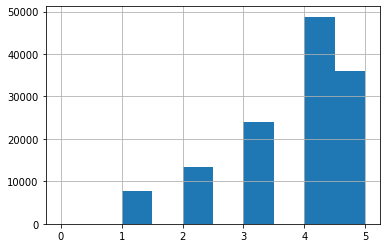

Plotting for column Online boarding


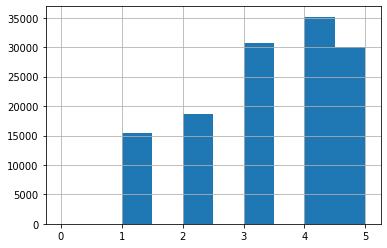

Plotting for column Departure Delay in Minutes


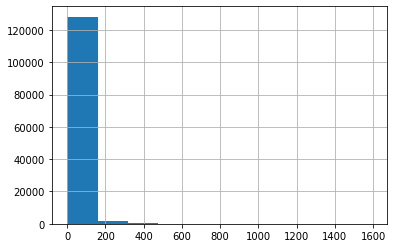

Plotting for column Arrival Delay in Minutes


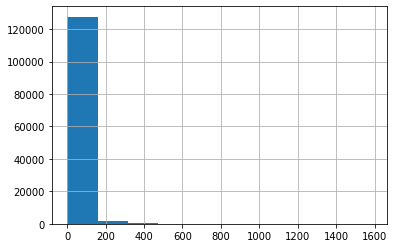

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for col in data_as_df.columns:
    hist = data_as_df[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

**1. Generalized Linear Model**

  GLM models allow us to build a linear relationship between the response and predictors, even though their underlying relationship is not linear. This is made possible by using a link function, which links the response variable to a linear model

In [17]:
# Import H2O GLM:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [18]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
03:38:41.790: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221108_33841

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.01341615465152146
RMSE: 0.11582812547702505
LogLoss: 0.04980585564063602
AUC: 0.9991143687897558
AUCPR: 0.9993038066599305
Gini: 0.9982287375795116
Null degrees of freedom: 9971
Residual degrees of freedom: 9964
Null deviance: 13713.385733299303
Residual deviance: 993.3279848968447
AIC: 1009.3279848968447

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42885137465725515
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  --------------
dissatisfied  4384            75           0.0168   (75.0/4459.0)
satisfied     75              5438         0.0136   (75.0/5513.0)
Total         4459            5513         0.015    (150.0/9972.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.428851     0.986396  201
max f2                       0.283735     0.989874  246
max f0point5                 0.546915     0.990491  169
max accuracy                 0.44124      0.984958  198
max precision                0.999925     1         0
max recall                   0.0450825    1         345
max specificity              0.999925     1         0
max absolute_mcc             0.44124      0.969584  198
max min_per_class_accuracy   0.44765      0.98475   196
max mean_per_class_accuracy  0.494732     0.98509   184
max tns                      0.999925     4459      0
max fns                      0.999925     3674      0
max fps                      0.00017489   4459      399
max tps                      0.0450825    5513      345
max tnr                      0.999925     1         0
max fnr                      0.999925     0.666425  0
max fpr                      0.00017489   1         399
max tpr                      0.0450825    1         345

Gains/Lift Table: Avg response rate: 55.28 %, avg score: 55.33 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100281                   0.999978           1.80882     1.80882            1                0.999983     1                           0.999983            0.0181389       0.0181389                  80.8816   80.8816            0.0181389
2        0.0200562                   0.999972           1.80882     1.80882            1                0.999974     1                           0.999978            0.0181389       0.0362779                  80.8816   80.8816            0.0362779
3        0.0300842                   0.999967           1.80882     1.80882            1                0.999969     1                           0.999975            0.0181389       0.0544168                  80.8816   80.8816            0.0544168
4        0.040012                    0.999962           1.80882     1.80882            1                0.999964     1                           0.999973            0.0179576       0.0723744                  80.8816   80.8816            0.0723744
5        0.0500401                   0.999957           1.80882     1.80882            1                0.999959     1                           0.99997             0.0181389       0.0905133                  80.8816   80.8816            0.0905133
6        0.10008                     0.999926           1.808

In [19]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20221108_33841,0.99451,0.0924281,0.995803,0.0391547,0.168975,0.0285526
StackedEnsemble_BestOfFamily_1_AutoML_1_20221108_33841,0.994382,0.09332,0.995718,0.0395504,0.169793,0.0288297
GBM_1_AutoML_1_20221108_33841,0.994283,0.0945481,0.995637,0.0401814,0.170554,0.0290887
GBM_3_AutoML_1_20221108_33841,0.994201,0.0962911,0.995525,0.0405544,0.171085,0.0292701
GBM_4_AutoML_1_20221108_33841,0.994169,0.0957313,0.995521,0.0403987,0.171243,0.0293243
GBM_2_AutoML_1_20221108_33841,0.993774,0.100439,0.995198,0.0426556,0.174078,0.030303
XGBoost_3_AutoML_1_20221108_33841,0.993434,0.101755,0.99496,0.0440871,0.176709,0.0312261
XGBoost_2_AutoML_1_20221108_33841,0.993347,0.102658,0.994917,0.0434404,0.177572,0.0315318
XGBoost_1_AutoML_1_20221108_33841,0.993222,0.103664,0.994807,0.0441177,0.178388,0.0318222
DRF_1_AutoML_1_20221108_33841,0.992403,0.122444,0.994381,0.0427801,0.184699,0.0341138


In [20]:
preds = aml.predict(test)
# or:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [21]:
# Get the best model using the metric
m = aml.leader
# this is equivalent to
m = aml.get_best_model()

In [22]:
m = aml.get_best_model(criterion="logloss")

Using GLM Estimator(one of the top performing models) so that I can tune hyperparameters and use regularization which is not available in other top performing models in h2o.

In [23]:
# Initialize the GLM estimator:
# lambda=0 (regularization is disabled) & remove "compute_p_values" command while checking for regularization, set lambda = 1
glm_fit1 = H2OGeneralizedLinearEstimator(model_id='glm_fit1', seed=1, compute_p_values = True, lambda_ = 0)

In [24]:
#train a default GLM
glm_fit1.train(x=x, y=y, training_frame=train, validation_frame=valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_fit1


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              23                            23                             5                       py_5_sid_bd07

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11865656435472424
RMSE: 0.34446562144098536
LogLoss: 0.38468200851569156
AUC: 0.9093533798647939
AUCPR: 0.9337828910872148
Gini: 0.8187067597295878
Null degrees of freedom: 90984
Residual degrees of freedom: 90961
Null deviance: 125285.14912828551
Residual deviance: 70000.58508960041
AIC: 70048.58508960041

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47786891082437194
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  -----------------
dissatisfied  32990           8117         0.1975   (8117.0/41107.0)
satisfied     6939            42939        0.1391   (6939.0/49878.0)
Total         39929           51056        0.1655   (15056.0/90985.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.477869     0.850833  208
max f2                       0.243658     0.88608   289
max f0point5                 0.73303      0.879491  125
max accuracy                 0.559212     0.838435  183
max precision                0.994564     1         0
max recall                   0.00293801   1         399
max specificity              0.994564     1         0
max absolute_mcc             0.583969     0.677833  175
max min_per_class_accuracy   0.535231     0.837363  190
max mean_per_class_accuracy  0.589039     0.840468  173
max tns                      0.994564     41107     0
max fns                      0.994564     49591     0
max fps                      0.00293801   41107     399
max tps                      0.00293801   49878     399
max tnr                      0.994564     1         0
max fnr                      0.994564     0.994246  0
max fpr                      0.00293801   1         399
max tpr                      0.00293801   1         399

Gains/Lift Table: Avg response rate: 54.82 %, avg score:  4.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100016                   0.076009           0.721642  0.721642           0.395604         0.0967174  0.395604                    0.0967174           0.00721761      0.00721761                 -27.8358  -27.8358           -0.00616211
2        0.0200033                   0.0688989          0.882007  0.801825           0.483516         0.071811   0.43956                     0.0842642           0.00882152      0.0160391                  -11.7993  -19.8175           -0.00877416
3        0.0300049                   0.0657239          0.970208  0.857952           0.531868         0.0671845  0.47033                     0.078571            0.00970368      0.0257428                  -2.97923  -14.2048           -0.00943368
4        0.0400066                   0.0637485          0.976221  0.88752            0.535165         0.0646596  0.486538                    0.0750931           0.00976382      0.0355

In [25]:
glm_fit1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Customer Type.disloyal Customer,1.996230,1.000000,0.198217
1,Gender.Male,0.976269,0.489056,0.096939
2,Inflight entertainment,0.919433,0.460585,0.091296
3,Class.Eco Plus,0.840707,0.421147,0.083479
4,Type of Travel.Personal Travel,0.762055,0.381747,0.075669
5,Class.Eco,0.741090,0.371245,0.073587
6,On-board service,0.405518,0.203142,0.040266
7,Seat comfort,0.397597,0.199174,0.039480
8,Checkin service,0.369971,0.185335,0.036737
9,Arrival Delay in Minutes,0.335131,0.167882,0.033277


In [26]:
data

satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0
satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0
satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15
satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0
satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0
satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26


In [27]:
x

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [28]:
coeff_table = glm_fit1._model_json['output']['coefficients_table']

In [29]:
coeff_table

names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,-4.7247508,0.0740907,-63.7698298,0.0,1.8307704
Class.Eco,-0.7410905,0.0253564,-29.2269219,0.0000000,-0.7410905
Class.Eco Plus,-0.8407068,0.0388815,-21.6223080,0.0000000,-0.8407068
Customer Type.disloyal Customer,-1.9962302,0.0299330,-66.6900151,0.0,-1.9962302
Type of Travel.Personal Travel,-0.7620551,0.0279075,-27.3064775,0.0000000,-0.7620551
Gender.Male,-0.9762692,0.0196696,-49.6335121,0.0,-0.9762692
Age,-0.0084135,0.0006828,-12.3216752,0.0000000,-0.1273033
Flight Distance,-0.0001057,0.0000103,-10.2739478,0.0000000,-0.1085614
Seat comfort,0.2850931,0.0109886,25.9443293,0.0000000,0.3975975
Departure/Arrival time convenient,-0.1998079,0.0080879,-24.7045781,0.0000000,-0.3054855


In [30]:
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-4.724751,0.074091,-63.769830,0.000000e+00,1.830770
1,Class.Eco,-0.741090,0.025356,-29.226922,8.823936e-188,-0.741090
2,Class.Eco Plus,-0.840707,0.038881,-21.622308,1.107958e-103,-0.840707
3,Customer Type.disloyal Customer,-1.996230,0.029933,-66.690015,0.000000e+00,-1.996230
4,Type of Travel.Personal Travel,-0.762055,0.027907,-27.306478,3.553189e-164,-0.762055
5,Gender.Male,-0.976269,0.019670,-49.633512,0.000000e+00,-0.976269
6,Age,-0.008413,0.000683,-12.321675,6.924084e-35,-0.127303
7,Flight Distance,-0.000106,0.000010,-10.273948,9.234657e-25,-0.108561
8,Seat comfort,0.285093,0.010989,25.944329,2.106984e-148,0.397597
9,Departure/Arrival time convenient,-0.199808,0.008088,-24.704578,9.549464e-135,-0.305485


 Since p values for all the variables are below 0.05, all features are significant.

Checking for collinearity using parameter "remove_collinear_columns"

In [31]:
glm_fit2 = H2OGeneralizedLinearEstimator(model_id='glm_fit2', seed=1, lambda_ = 0, remove_collinear_columns = True)

In [32]:
glm_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_fit2


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              23                            23                             5                       py_5_sid_bd07

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11865656435472424
RMSE: 0.34446562144098536
LogLoss: 0.38468200851569156
AUC: 0.9093533798647939
AUCPR: 0.9337828910872148
Gini: 0.8187067597295878
Null degrees of freedom: 90984
Residual degrees of freedom: 90961
Null deviance: 125285.14912828551
Residual deviance: 70000.58508960041
AIC: 70048.58508960041

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47786891082437194
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  -----------------
dissatisfied  32990           8117         0.1975   (8117.0/41107.0)
satisfied     6939            42939        0.1391   (6939.0/49878.0)
Total         39929           51056        0.1655   (15056.0/90985.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.477869     0.850833  208
max f2                       0.243658     0.88608   289
max f0point5                 0.73303      0.879491  125
max accuracy                 0.559212     0.838435  183
max precision                0.994564     1         0
max recall                   0.00293801   1         399
max specificity              0.994564     1         0
max absolute_mcc             0.583969     0.677833  175
max min_per_class_accuracy   0.535231     0.837363  190
max mean_per_class_accuracy  0.589039     0.840468  173
max tns                      0.994564     41107     0
max fns                      0.994564     49591     0
max fps                      0.00293801   41107     399
max tps                      0.00293801   49878     399
max tnr                      0.994564     1         0
max fnr                      0.994564     0.994246  0
max fpr                      0.00293801   1         399
max tpr                      0.00293801   1         399

Gains/Lift Table: Avg response rate: 54.82 %, avg score: 54.82 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100016                   0.991341           1.82415   1.82415            1                0.993172   1                           0.993172            0.0182445       0.0182445                  82.4151   82.4151            0.0182445
2        0.0200033                   0.988343           1.82415   1.82415            1                0.989765   1                           0.991468            0.0182445       0.036489                   82.4151   82.4151            0.036489
3        0.0300049                   0.985703           1.82014   1.82281            0.997802         0.986983   0.999267                    0.989973            0.0182044       0.0546935                  82.0142   82.2815            0.0546448
4        0.0400066                   0.983385           1.82415   1.82315            1                0.984506   0.999451                    0.988606            0.0182445       0.072938     

In [33]:
print(glm_fit1.auc())
print(glm_fit2.auc())

0.9093533798647939
0.9093533798647939


Since the auc scores for both fit is same, there is no multicollinearity.

In [34]:
print(glm_fit2.auc(train=True))
print(glm_fit2.auc(valid=True))

0.9093533798647939
0.9093634897724178


In [35]:
glm_fit2.confusion_matrix()

,dissatisfied,satisfied,Error,Rate
dissatisfied,32990.0,8117.0,0.1975,(8117.0/41107.0)
satisfied,6939.0,42939.0,0.1391,(6939.0/49878.0)
Total,39929.0,51056.0,0.1655,(15056.0/90985.0)


Most significant predictor variables(Top 10)

In [36]:
glm_fit1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Customer Type.disloyal Customer,1.996230,1.000000,0.198217
1,Gender.Male,0.976269,0.489056,0.096939
2,Inflight entertainment,0.919433,0.460585,0.091296
3,Class.Eco Plus,0.840707,0.421147,0.083479
4,Type of Travel.Personal Travel,0.762055,0.381747,0.075669
5,Class.Eco,0.741090,0.371245,0.073587
6,On-board service,0.405518,0.203142,0.040266
7,Seat comfort,0.397597,0.199174,0.039480
8,Checkin service,0.369971,0.185335,0.036737
9,Arrival Delay in Minutes,0.335131,0.167882,0.033277


Removing least important features(Online support, Baggage handling, Flight Distance, Inflight wifi service, Cleanliness)

In [37]:
x

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [38]:
x_new = ['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight entertainment',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Checkin service',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [39]:
glm_fit3 = H2OGeneralizedLinearEstimator(model_id='glm_fit3', seed=1, lambda_ = 0, remove_collinear_columns = True)
glm_fit3 = glm_fit3.train(x=x_new, y=y, training_frame=train, validation_frame=valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [40]:
print(glm_fit2.auc())
print(glm_fit3.auc())

0.9093533798647939
0.9086866219759588


Model Performance

In [41]:
glm_perf2 = glm_fit2.model_performance(test)
glm_perf2

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11945748990811988
RMSE: 0.34562622861715786
LogLoss: 0.38656056957947443
AUC: 0.9083704511840975
AUCPR: 0.9313970470669053
Gini: 0.8167409023681951
Null degrees of freedom: 19506
Residual degrees of freedom: 19483
Null deviance: 26906.812521306158
Residual deviance: 15081.274061573617
AIC: 15129.274061573617

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43600190958832
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  ----------------
dissatisfied  6908            2024         0.2266   (2024.0/8932.0)
satisfied     1287            9288         0.1217   (1287.0/10575.0)
Total         8195            11312        0.1697   (3311.0/19507.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.436002     0.848723  224
max f2                       0.23837      0.884163  291
max f0point5                 0.740409     0.877623  124
max accuracy                 0.551072     0.837033  188
max precision                0.994964     1         0
max recall                   0.00289255   1         399
max specificity              0.994964     1         0
max absolute_mcc             0.630324     0.675267  162
max min_per_class_accuracy   0.535159     0.835535  193
max mean_per_class_accuracy  0.630324     0.838512  162
max tns                      0.994964     8932      0
max fns                      0.994964     10536     0
max fps                      0.00289255   8932      399
max tps                      0.00289255   10575     399
max tnr                      0.994964     1         0
max fnr                      0.994964     0.996312  0
max fpr                      0.00289255   1         399
max tpr                      0.00289255   1         399

Gains/Lift Table: Avg response rate: 54.21 %, avg score: 54.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100477                   0.991102           1.84463   1.84463            1                0.992959  1                           0.992959            0.0185343       0.0185343                  84.4634   84.4634            0.0185343
2        0.0200441                   0.988164           1.84463   1.84463            1                0.989547  1                           0.991257            0.0184397       0.036974                   84.4634   84.4634            0.036974
3        0.0300405                   0.985233           1.84463   1.84463            1                0.986541  1                           0.989688            0.0184397       0.0554137                  84.4634   84.4634            0.0554137
4        0.0400369                   0.982984           1.84463   1.84463            1                0.984117  1                           0.988297            0.0184397       0.0738534                  84.4634   84.4634            0.0738534
5        0.0500333                   0.98103            1.82571   1.84085            0.989744         0.981958  0.997951                    0.98703             0.0182506       0.092104                   82.5714   84.0854            0.0918801
6        0.100015                    0.968899           1.83517   1.83802            0.994872         0.975026  0.996412                    0.981031            0.0917258       0.18383                    83.5174   83.8015            0.183046
7        0.149997         

After removing five insignificant variables, we see very minor differnce in the auc scores for glm_fit2 & glm_fit3

Checking for Regularization using parameter "lambda". We will also tune "lambda" using h2o grid search to get the best value of lambda.

In [42]:
#glm_fit4 = H2OGeneralizedLinearEstimator(model_id='glm_fit4', seed=1, lambda_ = .01)

In [43]:
from h2o.grid.grid_search import H2OGridSearch

# select the values for lambda_ to grid over
hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the glm estimator
glm_fit4 = H2OGeneralizedLinearEstimator(family = 'binomial')

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = glm_fit4, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

# sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by = 'auc', decreasing = True)
print(sorted_grid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing auc
    lambda    model_ids                                                       auc
--  --------  --------------------------------------------------------------  --------
    0.001     Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_5  0.909486
    0.0001    Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_6  0.909382
    0         Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_8  0.909363
    1e-05     Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_7  0.909347
    0.01      Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_4  0.907475
    0.1       Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_3  0.878063
    0.5       Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_model_2  0.828382
    1         Grid_GLM_py_5_sid_bd07_model_python_1667878690873_2696_

The **lambda** parameter controls the amount of regularization applied to the model. A non-negative value represents a shrinkage parameter, which multiplies P(α,β) in the objective. The larger lambda is, the more the coefficients are shrunk toward zero (and each other). When the value is 0, regularization is disabled, and ordinary generalized liner models are fit. The default value for lambda is calculated by H2O using a heuristic based on the training data.

With lambda = 0.001, our model performs best with AUC = 0.909486

# Final Answers for Binary Classification using GLM 

* Is the relationship significant?

  Ans: Since p values for all the variables are below 0.05, all features are significant.

* Are any model assumptions violated?

  Ans: The general linear model fitted using ordinary least squares makes four assumptions: linearity, homoskedasticity (constant variance), normality, and independence. After checking for all these violations above, we can say that no assumptions are violated.

* Is there any multicollinearity in the model?

  Ans: Using the parameter "remove_collinear_columns", we can see that there is no change in auc scores for both the fits. Therefore, there is no multicollinearity.

* In the multivariate models are predictor variables independent of all the other predictor variables?

  Ans: No. Collinear variables can be seen.

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Ans: 
  Most Significant variables:
  'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight entertainment',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Checkin service',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes'
  
  glm_fit3 depicts the model trained affter removing five insignificant variables.

* Does the model make sense?
  
  Ans: From our model performance, our model for binary classification makes sense as seen from the below performance metrics.

  MSE: 0.11945748990811988

  RMSE: 0.34562622861715786
  
  LogLoss: 0.38656056957947443

  AUC: 0.9083704511840975

* Does regularization help?

  Ans: Yes, it helps. With lambda = 0.001, our model performs best with AUC = 0.909486

* Which independent variables are significant?

  Ans: From the table we can see the most significant variables

  0 Customer Type.disloyal 	
1	Gender.Male	
2	Inflight entertainment	
3	Class.Eco Plus	
4	Type of Travel.Personal Travel	
5	Class.Eco	
6	On-board service	
7	Seat comfort	
8	Checkin service	
9	Arrival Delay in Minutes	
10	Food and drink	

* Which hyperparameters are important?

  Ans: lambda and alpha are the hyperparameters used in GLM which are used to control the amount of regularization.
  
  The alpha parameter controls the distribution between the ℓ1 (LASSO) and ℓ2 (ridge regression) penalties. A value of 1.0 for alpha represents LASSO, and an alpha value of 0.0 produces ridge reguression.

  The lambda parameter controls the amount of regularization applied. If lambda is 0.0, no regularization is applied, and the alpha parameter is ignored. The default value for lambda is calculated by H2O using a heuristic based on the training data. If you allow H2O to calculate the value for lambda, you can see the chosen value in the model output.



###**2. MULTICLASS CLASSIFICATION**

In [44]:
# Calculating Pearson's Correlation between all the features
a = data.cor()

In [45]:
data_df = a.as_data_frame()

In [46]:
cols = [i for i in data_df.columns]

In [47]:
df = data_df[(data_df[cols] > 0.5) | (data_df[cols] < -0.5)]

In [48]:
df.index = cols

In [49]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Travel,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat comfort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.715997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure/Arrival time convenient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.527381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food and drink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715997,0.527381,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the correlation matrix indicates, there are multiple features that are highly correlated(correlation >0.5 or <-0.5) to each other based on Pearsons Correlation. This indicates that there is multicollinearity between the features.

In [50]:
y = 'Class'
x = list(data.columns)

In [51]:
x.remove(y)  #remove the response

In [52]:
# Run AutoML, excluding "StackedEnsemble" algorithm as it does not support regularization
aml = H2OAutoML(max_models=5, seed=1, exclude_algos = ["StackedEnsemble"])
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_2_20221108_40527


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.07597981355153482
RMSE: 0.27564436063800546
LogLoss: 0.2476781783550715
Mean Per-Class Error: 0.29041264976311937
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Business    Eco    Eco Plus    Error      Rate
----------  -----  ----------  ---------  --------------
41169       2302   12          0.0532162  2,314 / 43,483
936         39890  42          0.0239307  978 / 40,868
465         4803   1366        0.794091   5,268 / 6,634
42570       46995  1420        0.0940814  8,560 / 90,985

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.905919
2    0.989713
3    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.11825282788736519
RMSE: 0.3438790890521917
LogLoss: 0.3893530032069288
Mean Per-Class Error: 0.36789818764418936
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Business    Eco    Eco Plus    Error      Rate
----------  -----  ----------  ---------  ---------------
39997       3382   104         0.0801693  3,486 / 43,483
1956        38502  410         0.0578937  2,366 / 40,868
673         5733   228         0.965632   6,406 / 6,634
42626       47617  742         0.134726   12,258 / 90,985

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.865274
2    0.961631
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.865274  0.00226801  0.866022      0.866681      0.866242      0.861241      0.866187
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.134726  0.00226801  0.133978      0.133319      0.133758      0.138759      0.133813
err_count                2451.6    41.2711     2438          2426          2434          2525          2435
logloss                  0.389353  0.00627128  0.386115      0.386619      0.383997      0.399839      0.390195
max_per_class_error      0.96561   0.00361256  0.961919      0.964394      0.97145       0.966276      0.964012
mean_per_class_accuracy  0.632108  0.00125509  0.633214      0.633176      0.631287      0.630348      0.632514
mean_per_class_error     0.367892  0.00125509  0.366786      0.366824      0.368713      0.369652      0.367486
mse                      0.118253  0.00207909  0.116984      0.117218      0.116666      0.121702      0.118694
pr_auc                   nan       0           nan           nan           nan           nan           nan
r2                       0.694288  0.00426184  0.6966        0.696131      0.698848      0.688327      0.691534
rmse                     0.343869  0.00301068  0.342029      0.342371      0.341565      0.348858      0.34452

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  --------------

In [53]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_2_AutoML_2_20221108_40527,0.367898,0.389353,0.343879,0.118253
XGBoost_1_AutoML_2_20221108_40527,0.367962,0.397905,0.345785,0.119567
GBM_1_AutoML_2_20221108_40527,0.369455,0.379451,0.340557,0.115979
DRF_1_AutoML_2_20221108_40527,0.375595,0.418359,0.355619,0.126465
GLM_1_AutoML_2_20221108_40527,0.445821,0.600708,0.438864,0.192602


In [54]:
preds = aml.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [55]:
df = test.cbind(preds)
df.head(2)

satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,predict,Business,Eco,Eco Plus
satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26,Eco,0.135197,0.785261,0.0795423
satisfied,Female,Loyal Customer,9,Personal Travel,Eco,3305,0,1,0,2,3,0,5,3,1,1,1,3,3,3,0,0,Eco,0.0686517,0.862582,0.0687658


In [56]:
best_model = aml.leader


In [57]:
best_model.model_performance(test)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.11483248491966604
RMSE: 0.3388694216356295
LogLoss: 0.37786906093500877
Mean Per-Class Error: 0.3679305854965213
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Business    Eco    Eco Plus    Error      Rate
----------  -----  ----------  ---------  --------------
8684        678    21          0.0744964  699 / 9,383
409         8244   63          0.0541533  472 / 8,716
132         1241   35          0.975142   1,373 / 1,408
9225        10163  119         0.130415   2,544 / 19,507

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.869585
2    0.964936
3    1

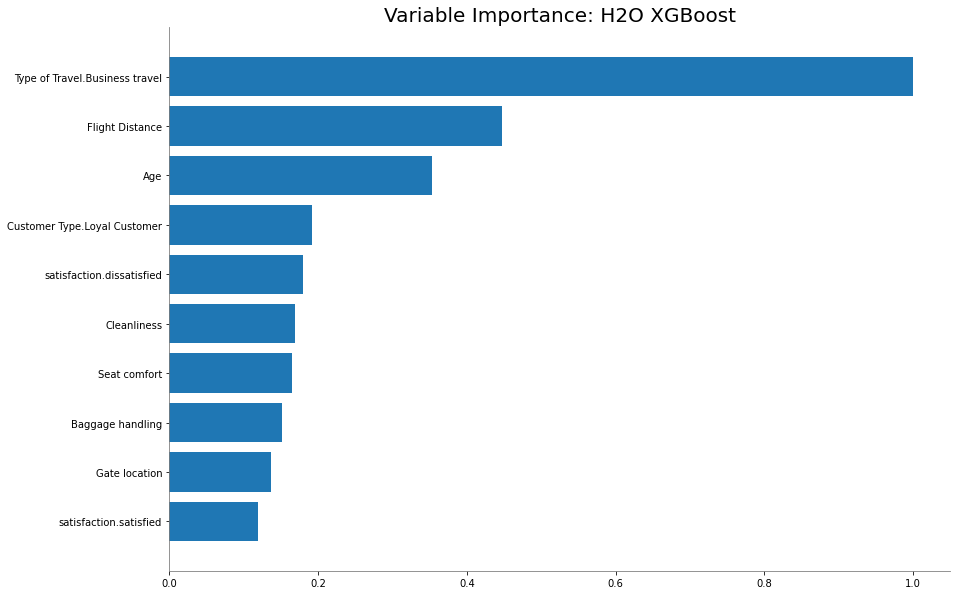

<Figure size 432x288 with 0 Axes>

In [58]:
%matplotlib inline
best_model.varimp_plot()

In [59]:
x_new = ['Type of Travel','Flight Distance','Age','Customer Type','satisfaction','Cleanliness','Seat comfort','Baggage handling','Gate location']

In [ ]:
aml2 = H2OAutoML(max_models=5, seed=1, exclude_algos = ["StackedEnsemble"])
aml2.train(x=x_new, y=y, training_frame=train)

In [ ]:
lb = aml2.leaderboard
lb.head(rows=lb.nrows)

# Final Answers for Multiclass Classification using XGBoost

* Is the relationship significant?

  Ans: Since p values for all the variables are below 0.05, all features are significant.

* Are any model assumptions violated?

  Ans: As XGBoost model is a boosted tree model, there are no assumptions for the normality, heteroskedasticity or absence of multicollinearity.

* Is there any multicollinearity in the model?

  Ans: No. Although there are multicollinear features in the model, as model is a boosted tree model the effects of multicollinearity are negligible.

* In the multivariate models are predictor variables independent of all the other predictor variables?

  Ans: No. Collinear variables can be seen from the pearson corelation matrix above.

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Ans:  Most Significant Variables:
        'Type of Travel','Flight Distance','Age','Customer Type','satisfaction','Cleanliness','Seat comfort','Baggage handling','Gate location'
  
  Before removing the insignificant variables, RMSE was 0.343879 for the best performing model. However, after removing the insignificant variables, it decreased to 0.24.

* Does the model make sense?
  
  Ans: From our model performance (model name:aml2 after removing insignificant variables), our model for multiclass classification makes sense as seen from the below performance metrics which depict GOOD performance.

  MSE: 0.050047965385194466

  RMSE: 0.2237140259018072

  LogLoss: 0.16486264481756308

  Mean Per-Class Error: 0.07185469441830408

  AUC: 0.9846066409483127

  AUCPR: 0.9876131306552951

  Gini: 0.9692132818966255

* Does regularization help?

  Ans: Yes, it helps. h2o regularizes XGBoost and we do not get to control it.

* Which independent variables are significant?

  Ans: From the table we can see the most significant variables are:
      'Type of Travel','Flight Distance','Age','Customer Type','satisfaction','Cleanliness','Seat comfort','Baggage handling','Gate location'

* Which hyperparameters are important?

  Ans: 
      number_of_trees,	number_of_internal_trees,	model_size_in_bytes,	min_depth,	max_depth,	min_leaves,	max_leaves are the important hyperparameters.




**3. REGRESSION**

In [8]:
y = 'Flight Distance'
x = list(data.columns)
x.remove(y)
x

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
reg_1 = H2OAutoML(max_models=10, seed = 1, exclude_algos = ["StackedEnsemble"])
reg_1.train(x=x,y = y, training_frame = train)

In [ ]:
reg_1.leaderboard.head()

Predict using leader model

In [ ]:
pred = reg_1.predict(test)
pred.head()

In [ ]:
perf = reg_1.leader.model_performance(test)
perf

In [ ]:
best_model = reg_1.leader
best_model.summary()
#below are the hyperparameters

In [ ]:
%matplotlib inline
best_model.varimp_plot()

Removing least important features

In [ ]:
x_new = ['Departure/Arrival time convenient','Food and drink','Seat comfort','Customer Type','Age','Flight Distance',
         'Inflight entertainment','Type of Travel','satisfaction','Leg room service']
 

In [ ]:
reg_2 = H2OAutoML(max_models=10, seed = 1, exclude_algos = ["StackedEnsemble"])
reg_2.train(x=x_new,y = y, training_frame = train)

In [ ]:
reg_2.leaderboard.head()

# Final Answers for Regression using Random Forest

* Is the relationship significant?

  Ans: Since p values for all the variables are below 0.05, all features are significant.

* Are any model assumptions violated?

  Ans: As Random Forest model is a tree model, there are no assumptions for the normality, heteroskedasticity or absence of multicollinearity.

* Is there any multicollinearity in the model?

  Ans: No. Although there are multicollinear features in the model, as model is a tree model the effects of multicollinearity are negligible.

* In the multivariate models are predictor variables independent of all the other predictor variables?

  Ans: No. Collinear variables can be seen from the pearson corelation matrix above.

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Ans: Most Significant features:
    
    'Departure/Arrival time convenient','Food and drink','Seat comfort','Customer Type','Age','Flight Distance','Inflight entertainment','Type of Travel','satisfaction','Leg room service'

* Does the model make sense?
  
  Ans: From our model performance, our model for regression makes sense as seen from the below performance metrics. 


* Does regularization help?

  Ans: Yes, regularization helps as it reduces the number of features selected for the problem. Random Forests do so by chosing the appropropriate value of Lambda.

* Which independent variables are significant?

  Ans: From the table we can see the most significant variables

    'Departure/Arrival time convenient','Food and drink','Seat comfort','Customer Type','Age','Flight Distance','Inflight entertainment','Type of Travel','satisfaction','Leg room service'

  

* Which hyperparameters are important?

  Ans: The important hyperparameters are ntrees, max_depth, min_rows.

# Conclusion

After this assignment we can confidently say that AutoML is a great tool as it offers high interpretibility. AutoML using H2O helps by training several models and giving us various comparison metrics for all of them, this helps us select the best performing model.

We do not have to perform feature engineering as AutoML takes care of it. It can be used for wide variety  of tasks including binary, multiclass classification and regression for any type or size of data.

# Refernces
1. H2O.ai offcial documentation
2. Refered Towards Data Science
  
  The algorithms were referred directly from the H2O.ai offcial documentation. The remaining code was written independently. Feature importance reference is taken from sklearn offical documnetation

3. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
4. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html
5. https://www.analyticsvidhya.com/blog/2020/11/exploring-linear-regression-with-h20-automlautomated-machine-learning/

Copyright 2022 Shivani Shekhawat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.